<a href="https://colab.research.google.com/github/juli-ter/UDL/blob/main/Demo_MAY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Demo for the 7 and 8 chapter

###BackProp

In [ ]:
!pip install torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import torch
import numpy as np
from torch import nn


In [ ]:
n_features = 2
n_objects = 300

torch.manual_seed(0)

w_true = torch.randn(n_features)
b_true = torch.randn(1)

x = (torch.rand(n_objects, n_features) - 0.5) * 10 * (torch.arange(n_features) * 2 + 1)
y = torch.matmul(x, w_true) + torch.randn(n_objects) + b_true

In [ ]:
x.shape


torch.Size([300, 2])

In [ ]:
y.shape


torch.Size([300])

In [ ]:
n_steps = 200
step_size = 1e-2

In [ ]:
w = torch.rand(n_features, requires_grad=True)
b = torch.rand(1, requires_grad=True)

for i in range(n_steps):
    y_pred = torch.matmul(x, w) + b

    mse = torch.mean((y_pred - y) ** 2)

    if i < 20 or i % 10 == 0:
        print(f'MSE on step {i + 1}: {mse.item():.5f}')

    mse.backward()

#     print(f'{w.grad=}\n')
#     print(f'{b.grad=}\n')

    with torch.no_grad():
        w -= w.grad * step_size
        b -= b.grad * step_size

    w.grad.zero_()
    b.grad.zero_()

MSE on step 1: 26.34247
MSE on step 2: 16.98163
MSE on step 3: 13.16658
MSE on step 4: 11.28192
MSE on step 5: 10.15195
MSE on step 6: 9.36814
MSE on step 7: 8.77162
MSE on step 8: 8.29041
MSE on step 9: 7.88633
MSE on step 10: 7.53658
MSE on step 11: 7.22644
MSE on step 12: 6.94607
MSE on step 13: 6.68868
MSE on step 14: 6.44959
MSE on step 15: 6.22547
MSE on step 16: 6.01397
MSE on step 17: 5.81336
MSE on step 18: 5.62241
MSE on step 19: 5.44014
MSE on step 20: 5.26584
MSE on step 21: 5.09893
MSE on step 31: 3.75790
MSE on step 41: 2.85935
MSE on step 51: 2.25599
MSE on step 61: 1.85082
MSE on step 71: 1.57873
MSE on step 81: 1.39601
MSE on step 91: 1.27331
MSE on step 101: 1.19091
MSE on step 111: 1.13557
MSE on step 121: 1.09842
MSE on step 131: 1.07346
MSE on step 141: 1.05671
MSE on step 151: 1.04545
MSE on step 161: 1.03790
MSE on step 171: 1.03282
MSE on step 181: 1.02941
MSE on step 191: 1.02713


In [ ]:
layer = nn.Linear(in_features=n_features, out_features=1)


for i in range(n_steps):
    y_pred = layer(x)

    mse = torch.mean((y_pred - y) ** 2)

    if i < 20 or i % 10 == 0:
        print(f'MSE on step {i + 1}: {mse.item():.5f}')

    mse.backward()

    with torch.no_grad():
        layer.weight -= layer.weight.grad * step_size
        layer.bias -= layer.bias.grad * step_size

#     layer.weight.grad.zero_()
#     layer.bias.grad.zero_()

    layer.zero_grad()

MSE on step 1: 34.54198
MSE on step 2: 32.95632
MSE on step 3: 32.17054
MSE on step 4: 31.68126
MSE on step 5: 31.32002
MSE on step 6: 31.02519
MSE on step 7: 30.77090
MSE on step 8: 30.54433
MSE on step 9: 30.33817
MSE on step 10: 30.14778
MSE on step 11: 29.97005
MSE on step 12: 29.80283
MSE on step 13: 29.64457
MSE on step 14: 29.49416
MSE on step 15: 29.35076
MSE on step 16: 29.21373
MSE on step 17: 29.08260
MSE on step 18: 28.95695
MSE on step 19: 28.83646
MSE on step 20: 28.72084
MSE on step 21: 28.60985
MSE on step 31: 27.71417
MSE on step 41: 27.11309
MSE on step 51: 26.70945
MSE on step 61: 26.43840
MSE on step 71: 26.25638
MSE on step 81: 26.13414
MSE on step 91: 26.05206
MSE on step 101: 25.99694
MSE on step 111: 25.95992
MSE on step 121: 25.93506
MSE on step 131: 25.91837
MSE on step 141: 25.90716
MSE on step 151: 25.89963
MSE on step 161: 25.89457
MSE on step 171: 25.89118
MSE on step 181: 25.88890
MSE on step 191: 25.88737


In [ ]:
layer(x).shape

torch.Size([300, 1])

In [ ]:
y.shape

torch.Size([300])

In [ ]:
(layer(x) - y).shape

torch.Size([300, 300])

In [ ]:
layer(x).ravel()

tensor([-2.7234, -2.7227, -2.7258, -2.7250, -2.7211, -2.7246, -2.7227, -2.7271,
        -2.7232, -2.7083, -2.7252, -2.7294, -2.7242, -2.7220, -2.7310, -2.7200,
        -2.7179, -2.7146, -2.7246, -2.7190, -2.7248, -2.7212, -2.7185, -2.7122,
        -2.7153, -2.7243, -2.7195, -2.7280, -2.7158, -2.7222, -2.7212, -2.7258,
        -2.7224, -2.7186, -2.7147, -2.7169, -2.7342, -2.7091, -2.7187, -2.7201,
        -2.7146, -2.7209, -2.7171, -2.7261, -2.7181, -2.7247, -2.7168, -2.7236,
        -2.7293, -2.7234, -2.7225, -2.7280, -2.7315, -2.7106, -2.7236, -2.7213,
        -2.7182, -2.7280, -2.7262, -2.7207, -2.7197, -2.7242, -2.7265, -2.7145,
        -2.7205, -2.7230, -2.7166, -2.7126, -2.7263, -2.7153, -2.7212, -2.7246,
        -2.7260, -2.7112, -2.7115, -2.7208, -2.7218, -2.7242, -2.7226, -2.7272,
        -2.7286, -2.7114, -2.7154, -2.7325, -2.7197, -2.7098, -2.7191, -2.7166,
        -2.7190, -2.7221, -2.7313, -2.7182, -2.7275, -2.7242, -2.7281, -2.7262,
        -2.7244, -2.7239, -2.7301, -2.72

In [ ]:
(layer(x).ravel() - y).shape

torch.Size([300])

In [ ]:
layer = nn.Linear(in_features=n_features, out_features=1)

for i in range(n_steps):
    y_pred = layer(x).ravel()

    mse = torch.mean((y_pred - y) ** 2)

    if i < 20 or i % 10 == 0:
        print(f'MSE on step {i + 1}: {mse.item():.5f}')

    mse.backward()

    with torch.no_grad():
        layer.weight -= layer.weight.grad * step_size
        layer.bias -= layer.bias.grad * step_size

    layer.zero_grad()

MSE on step 1: 42.20728
MSE on step 2: 24.47946
MSE on step 3: 16.02505
MSE on step 4: 11.34450
MSE on step 5: 8.46286
MSE on step 6: 6.57412
MSE on step 7: 5.29301
MSE on step 8: 4.40651
MSE on step 9: 3.78421
MSE on step 10: 3.34150
MSE on step 11: 3.02185
MSE on step 12: 2.78694
MSE on step 13: 2.61064
MSE on step 14: 2.47508
MSE on step 15: 2.36798
MSE on step 16: 2.28095
MSE on step 17: 2.20818
MSE on step 18: 2.14570
MSE on step 19: 2.09076
MSE on step 20: 2.04146
MSE on step 21: 1.99648
MSE on step 31: 1.66817
MSE on step 41: 1.45588
MSE on step 51: 1.31351
MSE on step 61: 1.21790
MSE on step 71: 1.15370
MSE on step 81: 1.11059
MSE on step 91: 1.08164
MSE on step 101: 1.06220
MSE on step 111: 1.04914
MSE on step 121: 1.04037
MSE on step 131: 1.03448
MSE on step 141: 1.03053
MSE on step 151: 1.02788
MSE on step 161: 1.02609
MSE on step 171: 1.02490
MSE on step 181: 1.02409
MSE on step 191: 1.02355


### Dataset

1. Go to your [Kaggle](https://www.kaggle.com/settings) account, Scroll to API section and Click Expire API Token to remove previous tokens

2. Click on Create New API Token - It will download kaggle.json file on your machine.

3. Add Kaggle username and token from the downloaded file to the Secrets menu on the left panel in Colab and allow acess.

In [ ]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [ ]:
!kaggle datasets download jayaantanaath/student-habits-vs-academic-performance
! unzip "student-habits-vs-academic-performance.zip"

Dataset URL: https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance
License(s): apache-2.0
  0% 0.00/19.1k [00:00<?, ?B/s]
100% 19.1k/19.1k [00:00<00:00, 29.7MB/s]
Archive:  student-habits-vs-academic-performance.zip
  inflating: student_habits_performance.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

import torch, torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.optim.lr_scheduler import StepLR
import random
random.seed(0)

In [ ]:
df = pd.read_csv('/content/student_habits_performance.csv')
df = pd.DataFrame(df)
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [ ]:
# Try attaching to GPU -- Use "Change Runtime Type to change to GPUT"
DEVICE = str(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
print('Using:', DEVICE)

Using: cpu


In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
df['student_id'].nunique()

1000

In [ ]:
df = df.drop(columns=["student_id"]) #all studen ids are unique

In [ ]:
df_y = df["exam_score"]
df_X = df.drop(columns=["exam_score"])

In [ ]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1000 non-null   int64  
 1   gender                         1000 non-null   object 
 2   study_hours_per_day            1000 non-null   float64
 3   social_media_hours             1000 non-null   float64
 4   netflix_hours                  1000 non-null   float64
 5   part_time_job                  1000 non-null   object 
 6   attendance_percentage          1000 non-null   float64
 7   sleep_hours                    1000 non-null   float64
 8   diet_quality                   1000 non-null   object 
 9   exercise_frequency             1000 non-null   int64  
 10  parental_education_level       909 non-null    object 
 11  internet_quality               1000 non-null   object 
 12  mental_health_rating           1000 non-null   in

In [ ]:
numerical = df_X._get_numeric_data().columns
categorical = list(set(df_X.columns) - set(numerical))
categorical

['parental_education_level',
 'part_time_job',
 'diet_quality',
 'extracurricular_participation',
 'gender',
 'internet_quality']

In [ ]:
numerical

Index(['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating'],
      dtype='object')

In [ ]:
df_X[categorical].nunique().values


array([3, 2, 3, 2, 3, 3])

In [ ]:
df_X[numerical].nunique().values

array([  8,  78,  60,  51, 320,  68,   7,  10])

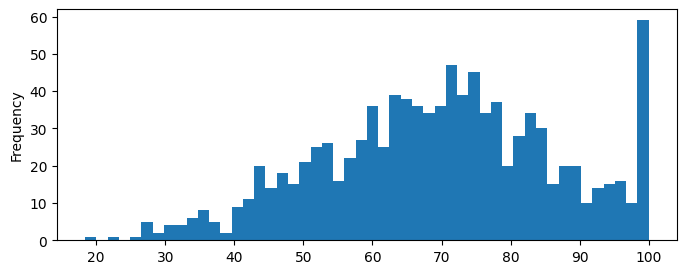

In [ ]:
df['exam_score'].plot(kind='hist', figsize=(8, 3), bins=50)
plt.show()

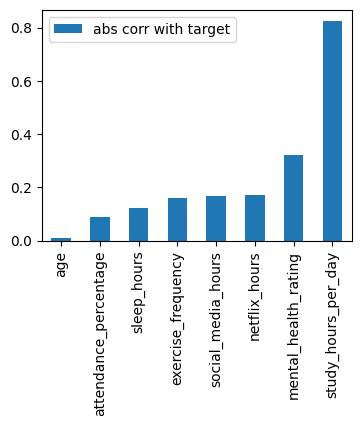

In [ ]:
corrs = [df[col].corr(df['exam_score']) for col in numerical]
corrs = pd.DataFrame(np.abs(corrs), numerical,
    ['abs corr with target']).sort_values('abs corr with target')
corrs.plot(kind='bar', figsize=(4, 3))
plt.show()

In [ ]:
#age can be dropped as almost no correlation

In [ ]:
label_encoder = LabelEncoder()
df[categorical] = df[categorical].apply(label_encoder.fit_transform)

In [ ]:
df

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,0,0.0,1.2,1.1,0,85.0,8.0,0,6,2,0,8,1,56.2
1,20,0,6.9,2.8,2.3,0,97.3,4.6,1,6,1,0,8,0,100.0
2,21,1,1.4,3.1,1.3,0,94.8,8.0,2,1,1,2,1,0,34.3
3,23,0,1.0,3.9,1.0,0,71.0,9.2,2,4,2,1,1,1,26.8
4,19,0,5.0,4.4,0.5,0,90.9,4.9,0,3,2,1,1,0,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,0,2.6,0.5,1.6,0,77.0,7.5,0,2,1,1,6,1,76.1
996,17,0,2.9,1.0,2.4,1,86.0,6.8,2,1,1,0,6,1,65.9
997,20,1,3.0,2.6,1.3,0,61.9,6.5,1,5,0,1,9,1,64.4
998,24,1,5.4,4.1,1.1,1,100.0,7.6,0,0,0,0,1,0,69.7


In [ ]:
y = df["exam_score"].to_numpy()
X = df.drop(columns=["exam_score"]).to_numpy()

### Bias & Varinace

In [ ]:
def compute_biase_variance(regressor, X, y, num_runs=1000):
  """
    :param regressor: sklearn estimator with fit(...) and predict(...) method
    :param X: numpy-array representing training set ob objects, shape [n_obj, n_feat]
    :param y: numpy-array representing target for training objects, shape [n_obj]
    :param num_runs: int, number of samples (s in the description of the algorithm)

    :returns: bias (float), variance (float), error (float)
    each value is computed using bootstrap
    """
  pred_sum = np.full((1, X.shape[0]), 0.0)[0]
  pred_sq = np.full((1, X.shape[0]), 0.0)[0]
  error = np.full((1, X.shape[0]), 0)[0]
  count = np.full((1, X.shape[0]), 0)[0]

  all = np.empty(X.shape[0])
  filler = np.arange(0, X.shape[0], 1)

  for j in range(num_runs):
    idxs = np.random.randint(0, X.shape[0], size=X.shape[0])
    X_j = X[idxs]
    regressor.fit(X_j, y[idxs])

    out = np.setdiff1d(filler, np.unique(idxs))
    Y_pred = regressor.predict(X[out])

    pred_sum[out] = np.add(pred_sum[out], Y_pred)
    pred_sq[out] = np.add(pred_sq[out], Y_pred**2)
    error[out] = np.add(error[out], (Y_pred - y[out])**2)
    count[out] += 1

  present = (count != 0)
  mean_pred = pred_sum[present] / count[present]
  bias = np.mean((mean_pred - y[present])**2)
  variance = np.mean(pred_sq[present]/ count[present] - mean_pred**2)
  error = np.mean(error[present]/ count[present])

  return bias, variance, error


In [ ]:
from sklearn.linear_model import LinearRegression
bias, variance, error = compute_biase_variance(LinearRegression(), X, y, 1000)
print('bias =', bias, '\n')
print('variance =', variance, '\n')
print('error =', error, '\n')

bias = 28.984289831173598 

variance = 0.45161159926026023 

error = 28.96564677261501 



Error really is almost the sum of a bias and variance!

In [ ]:
def plot_predictions(regressor, X, y, num_runs=100, num_test_objects=10, title=""):
    """
    plot graphics described above
    """
    all = np.empty(X.shape[0])
    filler = np.arange(0, X.shape[0], 1)

    plt.figure(figsize=(24,5))
    for i in range(0, len(regressor)):
        plt.subplot(131 + i)
        plt.title(title[i])
        plt.xlabel("Object")
        plt.ylabel("Values")
        plt.grid(True)
        plt.xticks((range(0, num_test_objects)))
        plt.ylim(0,100)


        tst = np.random.randint(0, X.shape[0], size=num_test_objects)
        X_test = X[tst]
        y_test = y[tst]

        out = np.setdiff1d(filler, np.unique(tst))
        X_train = X[out]
        y_train = y[out]

        for j in range(num_runs):
            idxs = np.random.randint(0, X_train.shape[0], size=X_train.shape[0])
            regressor[i].fit(X_train[idxs], y_train[idxs])

            #out = np.setdiff1d(filler, np.unique(idxs))
            Y_pred = regressor[i].predict(X_test)

            plt.scatter(range(0, num_test_objects), Y_pred, c = 'pink')
            plt.scatter(range(0, num_test_objects), y_test, c = 'black')

    plt.show()

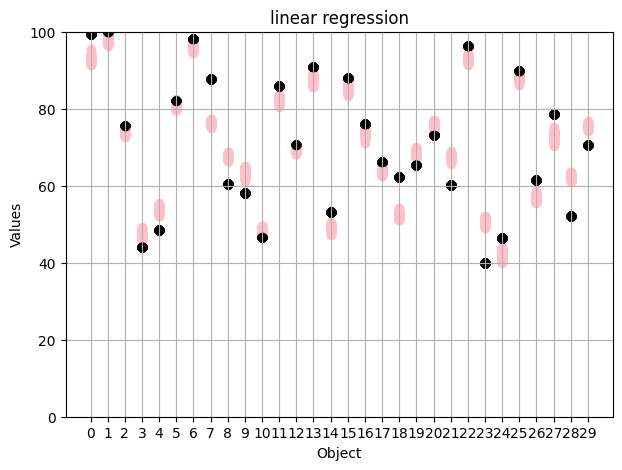

In [ ]:
regs = [LinearRegression()]
titles = ["linear regression"]
plot_predictions(regs, X, y, num_runs=100, num_test_objects=30, title=titles)

Linear regression has a high bias and a small variance; in most cases, the black dot does not lie between the prediction results.

### Hyperparameters

Graphs showing the dependence of bias and variance on hyperparameters

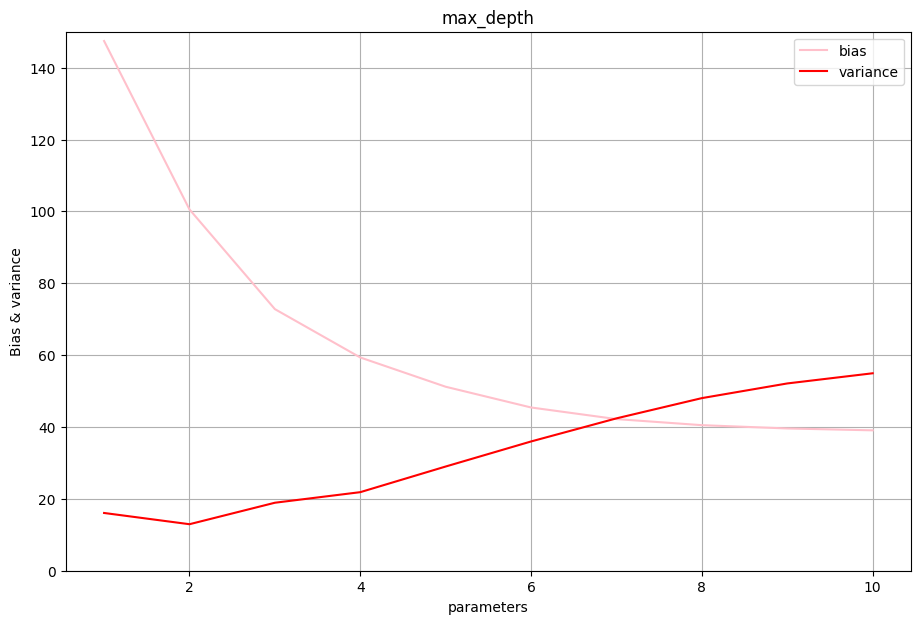

CPU times: user 49.9 s, sys: 118 ms, total: 50 s
Wall time: 53.9 s


In [ ]:
%%time
from sklearn.tree import DecisionTreeRegressor
plt.figure(figsize=(24,7))
for t in range(0, 1):
    plt.subplot(121 + t)

    plt.xlabel("parameters")
    plt.ylabel("Bias & variance")
    plt.grid(True)
    # plt.xticks((range(1, X.shape[1]+1)))
    plt.ylim(0,150)
    if t==0:
        b = []
        v = []
        plt.title("max_depth")
        for i in range (1, 11):
            bias, variance, error = compute_biase_variance(DecisionTreeRegressor(max_depth=i), X, y, 1000)
            b.append(bias)
            v.append(variance)
        plt.plot(range(1, 11), b, c = 'pink', label='bias')
        plt.plot(range(1, 11), v, c = 'red', label='variance')
        plt.legend()

plt.show()

### DDescet